## Machine Learning Workflow

Although the exact implementation details can vary, the general structure of a machine learning project stays relatively constant: 

1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Establish a baseline and compare several machine learning models on a performance metric
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the testing set
7. Interpret the model results to the extent possible
8. Draw conclusions and write a well-documented report




# Problem Statement
The objective is to use the energy data to build a model that can predict the Energy Star Score of a building and 
interpret the results to find the factors which influence the score.

#Goal :
Predict the Energy Star score

In [1]:
# loading the DataSet to DataFrame
import numpy as np
import pandas as pd

df = pd.read_csv("P:\Poobalan_Collection\machine-learning-project-walkthrough-master\data\Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")


In [3]:
#df

In [24]:
df.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [25]:
#To identify the Information about the given dataset.

df.describe

#contains 60 columnss

<bound method NDFrame.describe of        Order  Property Id                                 Property Name  \
0          1        13286                                       201/205   
1          2        28400                    NYP Columbia (West Campus)   
2          3      4778226                                 MSCHoNY North   
3          4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4          5      4778288                               Neuro Institute   
5          6        28402                     NYP Cornell (East Campus)   
6          7      4778352                       Annex Building & Garage   
7         10      2610789                            North Shore Towers   
8         11      2611745       Towers Golf Course and Irrigation Wells   
9         12      3616379                      North Shore Towers Bld 1   
10        13      5870374                      North Shore Towers Bld 2   
11        14      5870375                      North Shore Towers 

# As of now we know that our goal is to predict Energy star score, we are not aware about the details of the other columns.

Interpretability --- Key concept to understand atleast some of the columns 

#ok struck up with cleaning the data !!!

# Data cleaning  or Data Wrangling

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [15]:
df?


In [7]:
df = df.replace({'Not Available':np.nan})

In [21]:
df.head(2)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11735 non-null object
NYC Building Identification Number (BIN)                      11584 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     207 non-null object
Postal Code                                            

In [33]:
for col in list(df.columns):
    print(col);

Order
Property Id
Property Name
Parent Property Id
Parent Property Name
BBL - 10 digits
NYC Borough, Block and Lot (BBL) self-reported
NYC Building Identification Number (BIN)
Address 1 (self-reported)
Address 2
Postal Code
Street Number
Street Name
Borough
DOF Gross Floor Area
Primary Property Type - Self Selected
List of All Property Use Types at Property
Largest Property Use Type
Largest Property Use Type - Gross Floor Area (ft²)
2nd Largest Property Use Type
2nd Largest Property Use - Gross Floor Area (ft²)
3rd Largest Property Use Type
3rd Largest Property Use Type - Gross Floor Area (ft²)
Year Built
Number of Buildings - Self-reported
Occupancy
Metered Areas (Energy)
Metered Areas  (Water)
ENERGY STAR Score
Site EUI (kBtu/ft²)
Weather Normalized Site EUI (kBtu/ft²)
Weather Normalized Site Electricity Intensity (kWh/ft²)
Weather Normalized Site Natural Gas Intensity (therms/ft²)
Weather Normalized Source EUI (kBtu/ft²)
Fuel Oil #1 Use (kBtu)
Fuel Oil #2 Use (kBtu)
Fuel Oil #4 Use 

In [8]:
for col in list(df.columns):
    if('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col):
        df[col] = df[col].astype(float)
    

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11735 non-null object
NYC Building Identification Number (BIN)                      11584 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     207 non-null object
Postal Code                                            

In [40]:
df.head(3)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...


In [4]:
#df.describe()

In [14]:
df.loc[:,df.dtypes == np.float64]


,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
0,289356.0,293447.0,NaN,NaN,NaN,305.6,303.1,37.8,NaN,614.2,...,6962.2,762051.0,NaN,NaN,619.4,40.750791,-73.973963,6.0,4.0,88.0
1,3693539.0,3889181.0,NaN,NaN,55.0,229.8,228.8,24.8,2.4,401.1,...,4854.1,3889181.0,NaN,NaN,404.3,40.841402,-73.942568,12.0,10.0,251.0
2,152765.0,231342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,231342.0,NaN,NaN,NaN,40.840427,-73.940249,12.0,10.0,251.0
3,891040.0,1305748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1305748.0,NaN,NaN,NaN,40.840746,-73.942854,12.0,10.0,255.0
4,211400.0,179694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,179694.0,NaN,NaN,NaN,40.841559,-73.942528,12.0,10.0,255.0
5,2230742.0,2971874.0,NaN,NaN,55.0,359.9,359.0,8.3,4.8,411.5,...,-23134.3,2971874.0,NaN,NaN,414.2,40.761395,-73.957726,8.0,5.0,116.0
6,245000.0,245000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,245000.0,NaN,NaN,NaN,40.765949,-73.953752,8.0,5.0,124.0
7,3750565.0,2400000.0,900000.0,230200.0,NaN,143974.4,143976.0,NaN,1439.7,151174.5,...,0.0,2738875.0,107151.5,39.13,151172.9,40.757859,-73.715543,13.0,23.0,155101.0
8,3750565.0,200.0,NaN,NaN,NaN,1138.3,1091.5,319.9,NaN,3427.3,...,21.1,200.0,19261.1,96305.69,3574.2,40.757859,-73.715543,13.0,23.0,155101.0
9,3750565.0,2738875.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,912892.0,NaN,NaN,NaN,40.757859,-73.715543,13.0,23.0,155101.0


In [10]:
def missing_val_table(df):
    tot_mis_val = df.isnull().sum()
    tot_mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([tot_mis_val,tot_mis_val_percent],axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n There are " + str(mis_val_table_ren_columns.shape[0]) +
           " columns that have missing values.")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns


In [11]:
missing_val_table(df)
#df.isnull?

Your selected dataframe has 60 columns.
 There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


# Details about the columns
http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf
    
    What columns to retain may be a little arbitrary ([here is a discussion](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456)),

In [19]:
missingvaluetable = missing_val_table(df);
missing_columns = list(missingvaluetable[missingvaluetable['% of Total Values']>50].index)
print('We will remove %d columns'%len(missing_columns))



Your selected dataframe has 60 columns.
 There are 46 columns that have missing values.
We will remove 11 columns


In [21]:
#missing_columns
df = df.drop(columns = list(missing_columns))

# Exploratory Data Analysis

To begin the EDA, we will focus on a single variable, the Energy Star Score, because this is the target for our 
machine learning models. We can rename the column to `score` for simplicity 
and then start exploring this value.

# Single Variable Plots
Single variable (also called as univariate) plot shows the distribution of a single variable such as in a histogram

Text(0.5,1,'Energy Star Score Distribution')

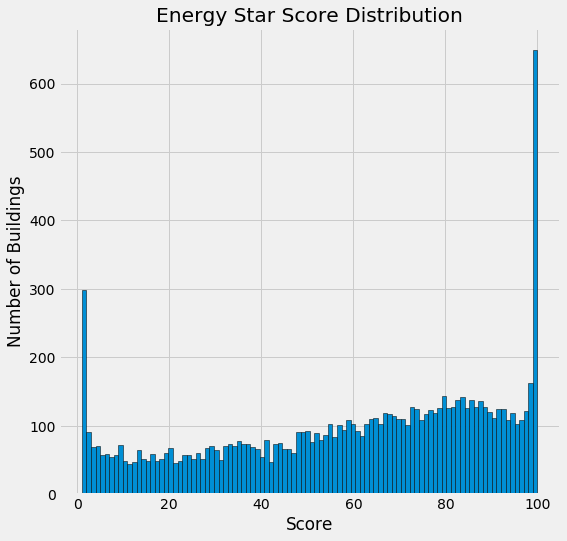

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
df = df.rename(columns = {'ENERGY STAR Score':'score'})
plt.style.use('fivethirtyeight')
plt.hist(df['score'].dropna(),bins=100,edgecolor = 'k');
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

Our first plot has already revealed some surprising (and suspicious) information! As the Energy Star Score is a percentile rank, we would expect to see a completely flat distribution with each score making up 1% of the distribution (about 90 buildings). However, this is definitely not the case as we can see that the two most common scores, 1 and 100, make up a disproporationate number of the overall scores. 

If we go back to the definition of the score, we see it is based on self-reported energy usage. This poses a problem, because a building owner might be tempted to report lower electricity usage to artificially boost the score of their building. It is like giving students a grade based on self-reported test scores. This behavior would explain the high percentage of buildings with a perfect score of 100, but does not explain why so many buildings score at the very bottom! 

To contrast the Energy Star Score, we can look at the Energy Use Intensity (EUI), which is the total energy use divided by the square footage of the building. Here the energy usage is not self-reported, so this could be a more objective measure of the energy efficiency of a building. Moreover, this is not a percentile rank, so the absolute values are important and we would expect them to be approximately normally distributed with perhaps a few outliers on the low or high end. 

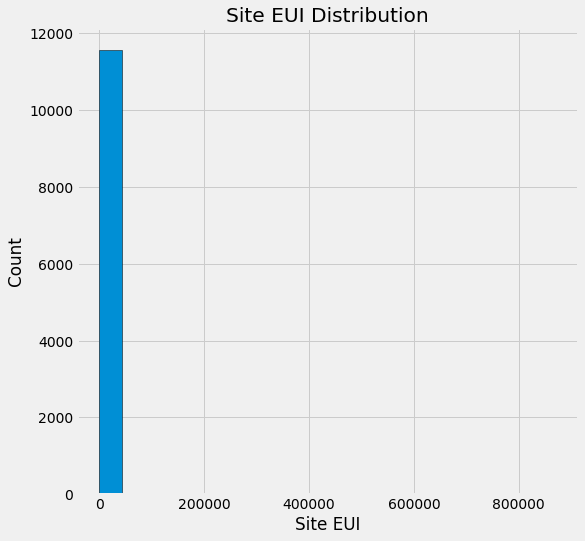

In [32]:
# Histogram Plot of Site EUI
plt.figure(figsize=(8, 8))
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

Well this shows us we have another problem: outliers! The graph is incredibly skewed because of the presence of a few buildings with very high scores. It looks like we will have to take a slight detour to deal with the outliers. Let's look at the stats for this feature.

In [33]:
df['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [34]:
df['score'].describe()

count    9642.000000
mean       59.854594
std        29.993586
min         1.000000
25%        37.000000
50%        65.000000
75%        85.000000
max       100.000000
Name: score, dtype: float64

In [35]:
df['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [38]:
df.loc[df['Site EUI (kBtu/ft²)'] == 869265,:]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,...,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


It might be worthwhile for someone to follow up with this building owner! However, that is not our problem and we only need to figure out how to handle this information. [Outliers](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm) can occur for many reasons: typos, malfunctions in measuring devices, incorrect units, or they can be legitimate but extreme values. Outliers can throw off a model because they are not indicative of the actual distribution of data. 

### Removing Outliers

When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate. When removing outliers, I try to be as conservative as possible, using the definition of an [extreme outlier](https://people.richland.edu/james/lecture/m170/ch03-pos.html): 

* On the low end, an extreme outlier is below  $\text{First Quartile} -3 * \text{Interquartile Range}$
* On the high end, an extreme outlier is above $\text{Third Quartile} + 3 * \text{Interquartile Range}$

In this case, I will only remove the single outlying point and see how the distribution looks.

# Calculate First Quartile and third Quartile

In [52]:
first_quartile = df['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = df['Site EUI (kBtu/ft²)'].describe()['75%']
#Interquartile Range
iqr = third_quartile - first_quartile

#Remove outliers
df = df[ (df['Site EUI (kBtu/ft²)'] > (first_quartile -3 * iqr)) &  (df['Site EUI (kBtu/ft²)'] < (third_quartile +3 * iqr))]
df['Site EUI (kBtu/ft²)'].describe()

count    11299.000000
mean        78.868811
std         32.942520
min          0.000000
25%         61.200000
50%         77.700000
75%         95.750000
max        199.300000
Name: Site EUI (kBtu/ft²), dtype: float64

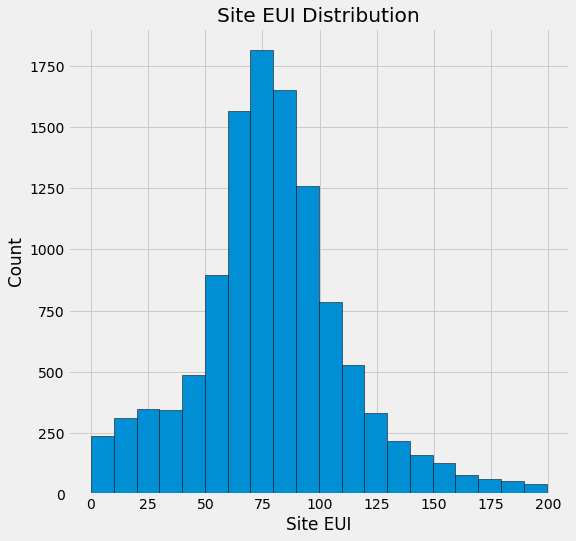

In [55]:
plt.figure(figsize=(8,8))
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(),bins=20,edgecolor='black');
plt.xlabel('Site EUI');
plt.ylabel('Count');
plt.title("Site EUI Distribution");

After removing the outliers, we can get back to the analysis.

This plot looks a little less suspicious and is close to normally distributed with a long tail on the right side (it has a positive skew). 

Although this might be a more objective measure, our goal is still to predict the Energy Star Score, so we will move back to examining that variable. Even if the score is not a good measure, it is still our task to predict it, so that is what we will try to do! In the final report back to the company, I will point out this might not be an objective measure, and it would be a good idea to use different metrics to determine the efficiency of a building. Moreover, if we had more time for this project, it might be interesting to take a look at buildings with scores of 1 and 100 to see if they have anything in common. 

## Looking for Relationships

In order to look at the effect of categorical variables on the score, we can make a [density plot](https://datavizcatalogue.com/methods/density_plot.html) colored by the value of the categorical variable. Density plots also show the distribution of a single variable and can be thought of as a smoothed histogram. 
If we color the density curves by a categorical variable, this will shows us how the distribution changes based on the class. 

The first plot we will make shows the distribution of scores by the property type. In order to not clutter the plot, we will limit the graph to building types that have more than 100 observations in the dataset. 

In [56]:
# Create a list of buildings with more than 100 measurements
types = df.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

In [57]:
types

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']